# Московский полумарафон "Лужники", 13 августа 2017

by [Sergey Bronnikov](https://bronevichok.ru/), BSD license
![OpenBSD logo](http://moscowmarathon.org/static/img/home/marathon/logo-luzhniki.png?1)

In [2]:
# -*- coding: utf-8 -*-
import pandas as pd
import json
import itertools
import collections
import numpy
import re
import datetime
import arrow
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,20)
plt.show(block=True)
%matplotlib inline

## Мужчины

### Призеры

In [3]:
mens = json.load(open('data/20170813_luzhniki_hm_m_21_1km.json')) # все зарегистрированные
male = [runner for runner in mens['data'] if runner[9] != "DQ"] # только финишеры
print repr([(runner[1], runner[2], runner[3], runner[4]) for runner in male[:5]]).decode('unicode_escape')

[(1, 6351, u'Grigorev', u'Oleg'), (2, 6905, u'Сафронов', u'Андрей'), (3, 6023, u'Логинов', u'Виталий'), (4, 4231, u'Барышников', u'Андрей'), (5, 3551, u'Щукин', u'Владислав')]


### Лучший и худший результат

In [3]:
print "Лучшее время у мужчин: ", male[0][9]
print "Худшее время у мужчин: ", male[-1][9]
print "Всего финишировавших мужчин: ", len(male)

Лучшее время у мужчин:  1:09:17
Худшее время у мужчин:  3:16:52
Всего финишировавших мужчин:  3910


### Рейтинг беговых клубов по количеству представленных мужчин

In [112]:
male_teams = lambda: (([runner[8], runner[7]]) for runner in male)

dfmt = pd.DataFrame(male_teams(), columns=['team', 'city'])
dfmt.replace([u'I LOVE RUNNING', u'I love running', u'I Love Running', u'ILR', u'ILOVERUNNING', u'ILOVERUNNING', u'iloverunning', u'Iloverunning'], u'I Love Running', inplace=True)
dfmt.replace([u'Academy marathon', u'Academy of marathon', u'Academy Marathon', u'Академия марафона', u'Академия Марафонского Бега'], u'Академия Марафона', inplace=True) 
dfmt.replace([u'ЦиклON', u'Циклон'], u'ЦиклОн', inplace=True)
dfmt.replace([u'Gepard', u'GEPARD'], u'GEPARD', inplace=True)
dfmt.replace([u'RunLab/AFRC', u'RUNLABclub', u'RUNLAB CLUB', u'RunLab Club'], u'RunLab Club', inplace=True)
dfmt.replace([u'adidas runners', u'adidas runners AR Нагорныйсила', u'Adidas Runners', u'Adidas', u'ADIDAS RUNNERS', u'Adidas RunClub', u'ADIDAS RUNNERS MOSCOW', u'Adidas Runclub Fili', u'Adidas Runners Ivanovo', u'Adidas runners', u'Adidas runnes club Mitino', u'Adidas RunClub Sokolniki', u'Adidas Run Club Izmailovo', u'Adidas run club Kirov', u'runess club adidas тушино', u'Adidas Runners Университет', u'Adidas Runners Atrium', u'ADIDAS RUNNERS ULTRA', u'adidas Runners', u'ADIDAS RUNCLUB> ЛОСИНЫЙ', u'AR Ekaterinburg'], u'Adidas Runners', inplace=True) 
result = dfmt.groupby('team').aggregate(len)
#result = dfmt.groupby('team').size()
result.sort_values(result.columns[0], ascending=[1], inplace=True)
#result.loc[result['city'] > 5]
result.drop(u"нет")
#result[result.team != u'нет']
result.tail(31)
#result.plot.bar(stacked=False);
# игнорировать команды: нет, Нет, 0, Лично, лично

,city
team,
Лично,5
Moskva River Runners,5
Академия Марафона,5
ABST,5
IRC,5
КЛЭБ,5
БиМ,5
RunLab Club,5
RunLepraRun,5


### Рейтинг беговых клубов по количеству мужчин из первой сотни финишеров

In [5]:
rating = dfmt.head(100)
rating100 = rating.groupby('team').aggregate(len)
rating100.sort_values(rating100.columns[0], ascending=[1], inplace=True)
rating100
# игнорировать команды: нет, Нет, 0, Лично, лично

,city
team,
VALLENA,1
Wake and run,1
You Can Run Minsk,1
Айвика,1
Аматар,1
БиМ,1
ДЮСШ Витязь,1
Динамо,1
ЗАЙКА,1


### Рейтинг городов по количеству мужчин

In [123]:
male_city = lambda: (([runner[8], runner[7]]) for runner in male)
dfmc = pd.DataFrame(male_city(), columns=['team', 'city'])
cities = dfmc.groupby('city').aggregate(len)
cities.sort_values(cities.columns[0], ascending=True, inplace=True)
cities.tail(20)

,team
city,
Щёлково,9
РЕУТОВ,10
Королев,11
Тверь,11
Воронеж,11
ДОЛГОПРУДНЫЙ,11
ЖУКОВСКИЙ,11
Подольск,13
Тула,13


### Рейтинг стран по количеству мужчин

In [125]:
male_country = lambda: (([runner[8], runner[6]]) for runner in male)

dfmco = pd.DataFrame(male_country(), columns=['team', 'country'])
countries = dfmco.groupby('country').aggregate(len)
countries.sort_values(countries.columns[0], ascending=[1], inplace=True)
countries.tail(9) # все страны с более, чем одним участником

,team
country,
Latvia,2
Uzbekistan,2
Germany,2
Colombia,2
Netherlands,3
Ukraine,5
China,6
Belarus,12
Russia,3854


### Распределение мужчин по возрасту

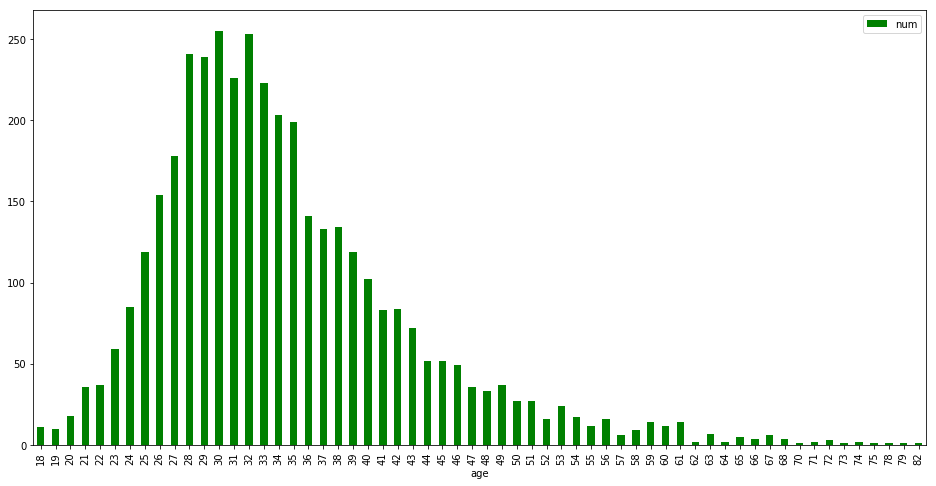

In [93]:
male_age = lambda: (([runner[5], runner[6]]) for runner in male)
dfma = pd.DataFrame(male_age(), columns=['age', 'num'])
dfma = dfma.groupby('age').aggregate(len)
dfma.plot.bar(figsize=(16, 8), stacked=False, color='Green');

### Распределение количества мужчин по времени преодоления дистанции и отдельных сплитов (5, 10, 15 и 20 км)

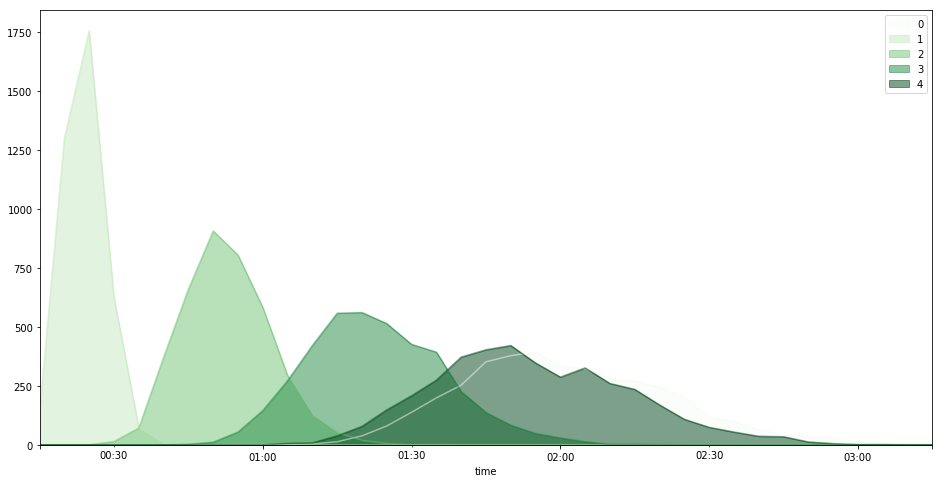

In [94]:
# https://stackoverflow.com/questions/23966152/how-to-create-a-group-id-based-on-5-minutes-interval-in-pandas-timeseries
def timeseries(data, index):
    time = pd.DataFrame()
    time['time'] = [runner[index] for runner in data]
    time['time'] = pd.to_datetime(time['time'])
    time = time.set_index(['time'])
    time['num'] = [1 for runner in data]
    #time.resample('5Min').sum()
    return time.groupby(pd.TimeGrouper('5Min'))['num'].sum()

result = pd.concat([timeseries(male, 9), timeseries(male, 11), timeseries(male, 12), timeseries(male, 13), timeseries(male, 14)], axis=1, ignore_index=True)
#result.plot.bar(figsize=(16, 8), stacked=False);
result.plot.area(figsize=(16, 8), stacked=False, colormap="Greens");

## Женщины

### Призеры

In [38]:
womans = json.load(open('data/20170813_luzhniki_hm_f_21_1km.json'))
female = [runner for runner in womans['data'] if runner[9] != "DQ"]

print repr([(runner[3], runner[4]) for runner in female[:5]]).decode('unicode_escape')

[(u'Конякина', u'Юлия'), (u'Попкова', u'Наталья'), (u'Сидорова', u'Алла'), (u'Чудайкина', u'Дарья'), (u'Тарантинова', u'Ольга')]


### Лучший и худший результат

In [10]:
print "Лучшее время у женщин: ", female[0][9]
print "Худшее время у женщин: ", female[-1][9]
print "Всего финишировавших женщин: ", len(female)

Лучшее время у женщин:  1:18:00
Худшее время у женщин:  3:08:22
Всего финишировавших женщин:  1612


### Рейтинг беговых клубов по количеству представленных женщин

In [11]:
female_teams = lambda: (((runner[8], runner[7]) for runner in female))

dfft = pd.DataFrame(female_teams(), columns=['team', 'city'])
dfft.replace([u'I LOVE RUNNING', u'I love running', u'I Love Running', u'ILR', u'ILOVERUNNING', u'ILOVERUNNING', u'iloverunning', u'Iloverunning'], u'I Love Running', inplace=True)
dfft.replace([u'Academy marathon', u'Academy of marathon', u'Academy Marathon', u'Академия марафона', u'Академия Марафонского Бега'], u'Академия Марафона', inplace=True) 
dfft.replace([u'ЦиклON', u'Циклон'], u'ЦиклОн', inplace=True)
dfft.replace([u'Gepard', u'GEPARD', u'marathonclubGEPARD'], u'GEPARD', inplace=True)
dfft.replace([u'RunLab/AFRC', u'RUNLABclub', u'RUNLAB CLUB', u'RunLab Club'], u'RunLab Club', inplace=True)
dfft.replace([u'adidas runners', u'adidas runners AR Нагорныйсила', u'Adidas Runners', u'Adidas', u'ADIDAS RUNNERS', u'Adidas RunClub', u'ADIDAS RUNNERS MOSCOW', u'Adidas Runclub Fili', u'Adidas Runners Ivanovo', u'Adidas runners', u'Adidas runnes club Mitino', u'Adidas RunClub Sokolniki', u'Adidas Run Club Izmailovo', u'Adidas run club Kirov', u'runess club adidas тушино', u'Adidas Runners Университет', u'Adidas Runners Atrium', u'ADIDAS RUNNERS ULTRA', u'adidas Runners', u'ADIDAS RUNCLUB> ЛОСИНЫЙ', u'AR Ekaterinburg'], u'Adidas Runners', inplace=True) 
result = dfft.groupby('team').aggregate(len)
#result = dfmt.groupby('team').size()
result.sort_values(result.columns[0], ascending=[1], inplace=True)
#result.loc[result['city'] > 5]
result.tail(31)
#result.plot.bar(stacked=False);
# игнорировать команды: нет, Нет, 0, Лично, лично

,city
team,
World class,2
RunStart,2
Vernadka,2
Stride,2
Бегущий человек,2
Sekta Run,2
SEKTARUN,2
Adidas runclub,3
Академия Марафона,3


### Рейтинг беговых клубов по количеству женщин из первой сотни финишеров

In [12]:
rating = dfft.head(100)
rating100 = rating.groupby('team').aggregate(len)
rating100.sort_values(rating100.columns[0], ascending=[1], inplace=True)
rating100
# игнорировать команды: нет, Нет, 0, Лично, лично

,city
team,
TopRun,1
far2run,1
parkrun Бутово,1
runleprarun,1
Бегущий человек,1
КБП,1
Лобненский беговой клуб,1
Марафон в темноте,1
Новатор,1


### Рейтинг городов по количеству женщин

In [13]:
female_city = lambda: (([runner[8], runner[7]]) for runner in female)
dffc = pd.DataFrame(female_city(), columns=['team', 'city'])
cities = dffc.groupby('city').aggregate(len)
cities.sort_values(cities.columns[0], ascending=[1], inplace=True)
cities.tail(20)

,team
city,
Домодедово,3
ФРЯЗИНО,3
Пермь,3
Минск,3
ЛЮБЕРЦЫ,4
Мытищи,4
Электросталь,5
ДОЛГОПРУДНЫЙ,5
Одинцово,5


### Рейтинг стран по количеству женщин

In [14]:
female_country = lambda: (([runner[8], runner[6]]) for runner in female)

dffco = pd.DataFrame(female_country(), columns=['team', 'country'])
countries = dffco.groupby('country').aggregate(len)
countries.sort_values(countries.columns[0], ascending=[1], inplace=True)
countries.tail(9) # все страны с более, чем одним участником

,team
country,
Japan,1
Kazakhstan,1
Ukraine,1
United States,1
China,2
Netherlands,2
United Kingdom,2
Belarus,3
Russia,1595


### Распределение женщин по возрасту

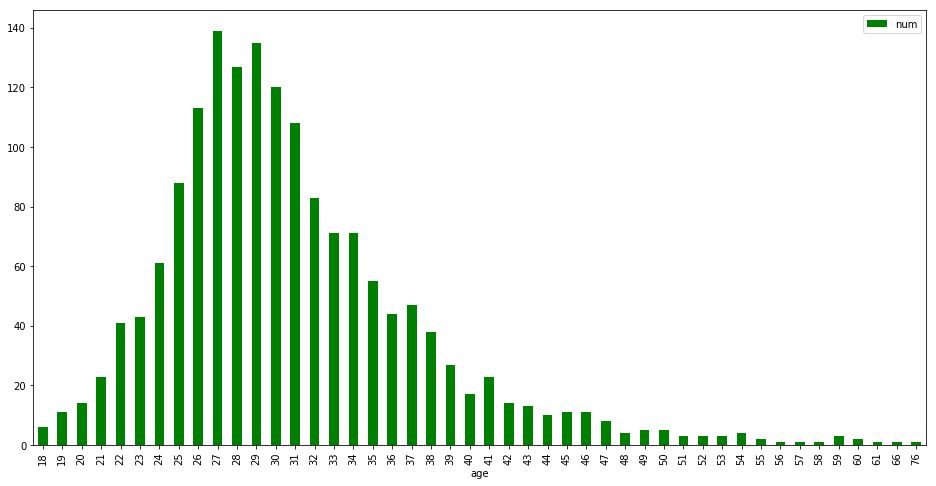

In [95]:
female_age = lambda: (([runner[5], runner[6]]) for runner in female)
dffa = pd.DataFrame(female_age(), columns=['age', 'num'])
dffa = dffa.groupby('age').aggregate(len)
dffa.plot.bar(figsize=(16, 8), stacked=False, color='Green');

### Распределение женщин по времени преодоления дистанции и отдельных сплитов (5, 10, 15 и 20 км)

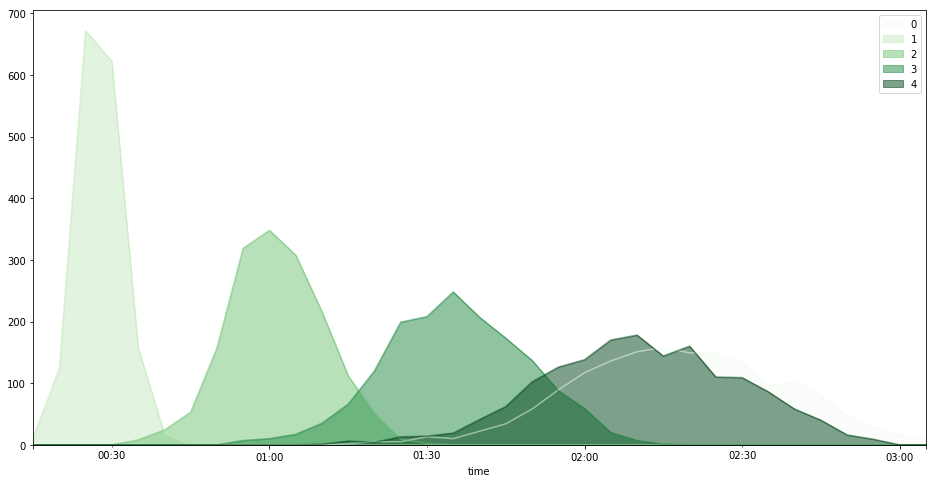

In [96]:
timeseries(female, 12)
result = pd.concat([timeseries(female, 9), timeseries(female, 11), timeseries(female, 12), timeseries(female, 13), timeseries(female, 14)], axis=1, ignore_index=True)
result.plot.area(figsize=(16, 8), stacked=False, colormap="Greens");

## Общие данные

In [16]:
total = female + male
print "Всего финишировавших участников: ", len(total)

min = 100
max = 0
imin = []
imax = []
index = 0
for runner in total:
    if min >= runner[5]:
        min = runner[5]
        imin = index
        
    if max < runner[5]:
        max = runner[5]
        imax = index
    index = index + 1

print "Самый молодой участник", min, repr(total[imin]).decode('unicode_escape')
print "Самый старый участник", max, repr(total[imax]).decode('unicode_escape')

Всего финишировавших участников:  5522
Самый молодой участник 18 [3029, 3808, 5414, u'Егоршев', u'Иван', 18, u'Russia', u'Москва', u'', u'2:19:31', u'10:10:00', u'0:25:27', u'0:56:42', u'1:32:34', u'2:11:46']
Самый старый участник 82 [2839, 3509, 488, u'Новиков', u'Владимр', 82, u'Russia', u'ФРЯЗИНО', u'Спутник', u'2:15:46', u'10:10:00', u'0:30:21', u'1:02:38', u'1:35:41', u'2:08:39']


### Распределение всех спортсменов по возрасту

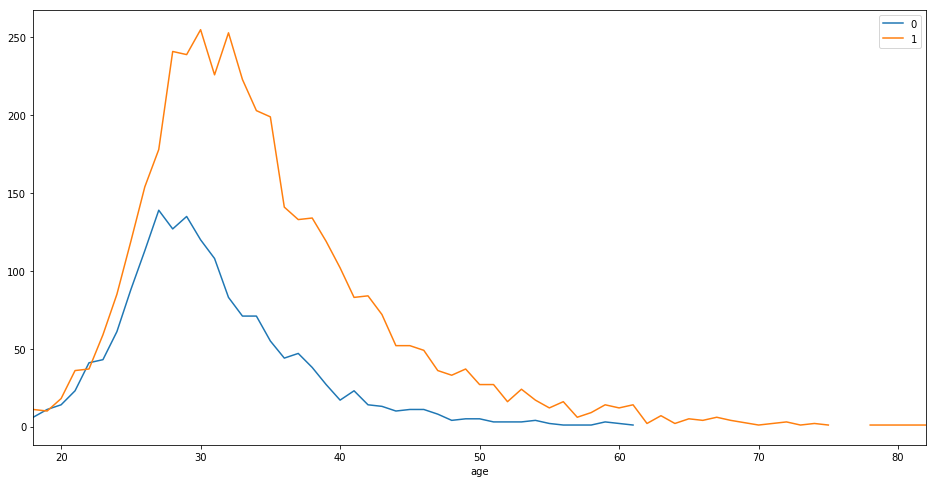

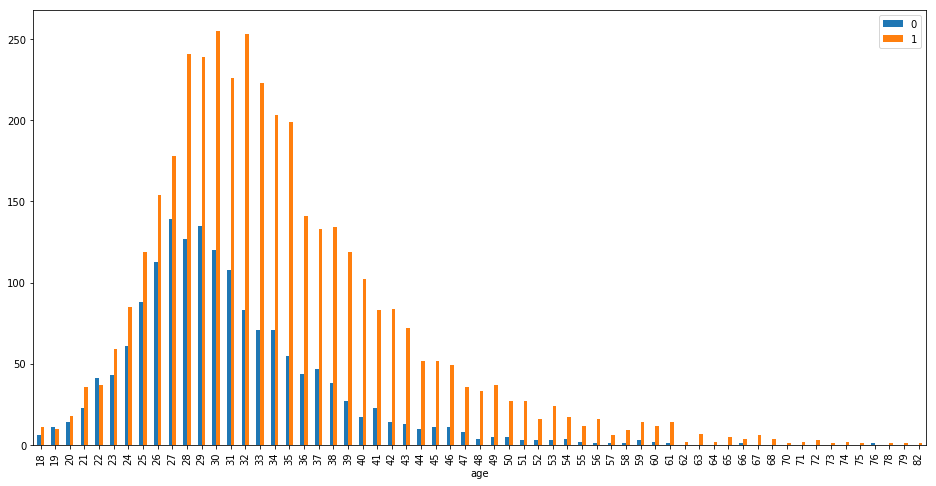

In [100]:
total_age = pd.concat([dffa, dfma], axis=1, ignore_index=True)
ax1 = total_age.plot(figsize=(16, 8))
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines[:2], labels[:2], loc='best')  
total_age.plot.bar(figsize=(16, 8), stacked=False);

### TODO

- [Визуализация Московского марафона 2016](http://moscowmarathon.org/ru/moscowmarathon/2016/race-results/visualization/) и [рассказ](http://newrunners.ru/mag/pryamaya-rech-tatyana-bibikova-o-vizualizacii-mara/)
- [Визуализация марафона Белые ночи 2014](http://white-nights.datalaboratory.ru/)

На выходных у меня появилось немного свободного времени, чтобы посмотреть поближе на результаты полумарафона Лужники. 
Это все любопытные данные, но неинтересные.

клубы: СЕМЕЙНЫЙ ЛАГЕРЬ БОБИК, из бильбао, зелепухиных, running club КРОК с одним человеком